In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as con
import scipy

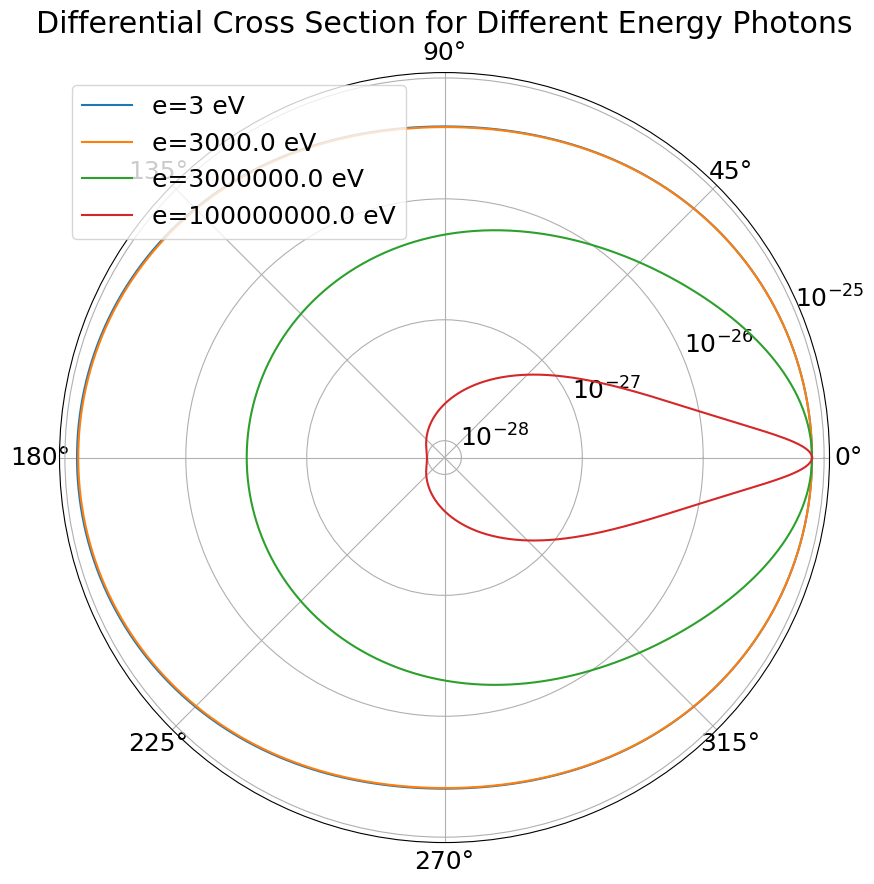

In [2]:
def calc_e1(e,theta):
    '''calculate e1

    Inputs:

        e: float

            energy before collision

        theta: np array

            array of collision angles

    Returns:

        e1: np

            array of energy after collision at each angle, theta

    '''

    #calculate e1
    e1=e/(1+e/(con.m_e.cgs.value*con.c.cgs.value**2)*((1-np.cos(theta))))

    return e1

def diff_cross(e,theta):
    '''calculate the differential cross section

    Inputs:

        e: float

            energy before collision

        theta: np array

            array of collision angles

    Returns:

        dsdw: np array

            The differential cross section: The cross sectional
            area per solid angle at each angle theta

'''

    #find e1 using the e1 function
    e1=calc_e1(e,theta)

    #define the bohr radius
    r=con.e.esu.value**2/(con.m_e.cgs.value*con.c.cgs.value**2)

    #calculate differential cross section
    dsdw=(r**2/2)*(e1**2/e**2)*((e/e1)+(e1/e)-np.sin(theta)**2)

    return dsdw

#create array of thetas
theta=np.linspace(0,2*np.pi,1000)

#set font size, initia;ize polar plot
plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(subplot_kw={'projection':'polar'},figsize=(10,10))

#create initial photon energy list
e_list=[3,3E3,3E6,100E6]

#iterate through photon energies, creating a differential cross section plot for each one
for e in e_list:

    #find the differential cross section at each angle
    pow=diff_cross(e/6.242e+11,theta)
    
    #plot the differential cross section vs theta
    plt.plot(theta,pow,label=('e='+str(e)+' eV'))

#adjust plot parameters and create legend
plt.yscale('log')
ax.set_aspect('equal')
ax.set(title='Differential Cross Section for Different Energy Photons')
ax.legend()

C:\Users\ceg30\AppData\Local\Temp\ipykernel_54084\2365838048.py:19: RuntimeWarning: divide by zero encountered in divide
  value=((1+x)/x**3)*((2*x*(1+x))/(1+2*x)-np.log(1+2*x))+1/(2*x)*np.log(1+2*x)-(1+3*x)/(1+2*x)**2
C:\Users\ceg30\AppData\Local\Temp\ipykernel_54084\2365838048.py:19: RuntimeWarning: invalid value encountered in multiply
  value=((1+x)/x**3)*((2*x*(1+x))/(1+2*x)-np.log(1+2*x))+1/(2*x)*np.log(1+2*x)-(1+3*x)/(1+2*x)**2


[Text(0.5, 1.0, 'Scattering Cross Section VS x'),
 Text(0.5, 0, 'x ($h \\nu/k_bt$)'),
 Text(0, 0.5, 'Scattering Cross section (cm$^{2}$)')]

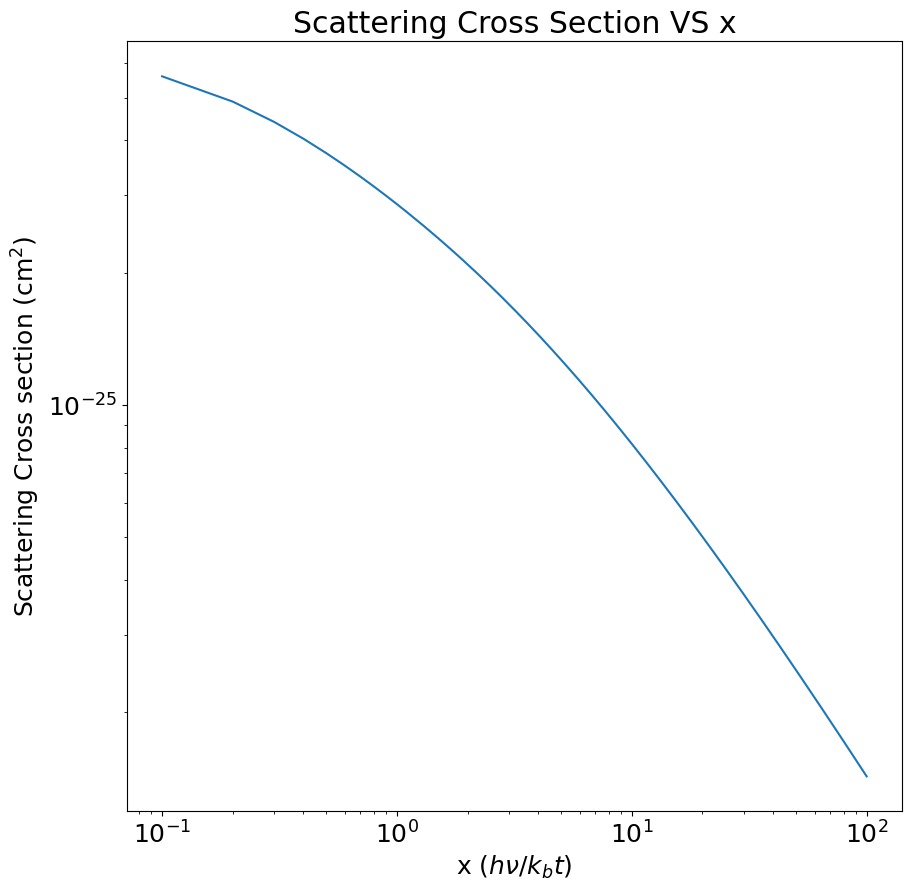

In [3]:
def func_sig(x):
    '''function to calculate the total cross section

    Inputs:

        x: np array

            array of photon energies (hv/kt)

    Returns:

        value: np array

            array holding cross section at each photon energy

    '''

    #calculate one chunk of the cross section equation
    value=((1+x)/x**3)*((2*x*(1+x))/(1+2*x)-np.log(1+2*x))+1/(2*x)*np.log(1+2*x)-(1+3*x)/(1+2*x)**2

    #calculate the cross section
    value*=con.sigma_T.cgs.value*3/4

    return value

#create array pf x values
x=np.linspace(0,100,1000)

#calculate cross section at each value
y=func_sig(x)

#plot the results
plt.rcParams.update({'font.size': 18})
fix,ax=plt.subplots(figsize=(10,10))
plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')
ax.set(title='Scattering Cross Section VS x', xlabel='x ($h \\nu/k_bt$)',ylabel='Scattering Cross section (cm$^{2}$)')

213.1213121312131 8500108851.305529
-5814038.988814511


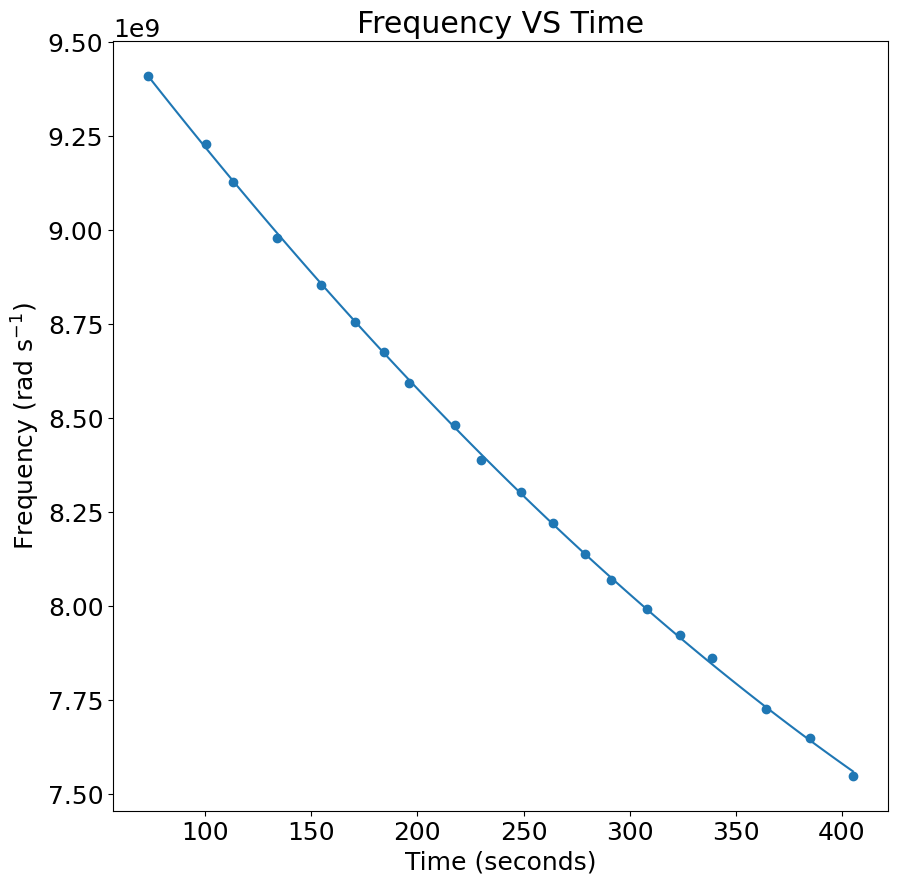

In [16]:
#frequency and times from figure 1
time_list=np.array([73.19223986,
100.5291005,
113.3156966,
134.0388007,
154.7619048,
170.6349206,
184.303351,
196.2081129,
217.8130511,
230.1587302,
248.6772487,
264.1093474,
279.1005291,
291.4462081,
308.2010582,
323.633157,
338.6243386,
364.1975309,
384.9206349,
405.2028219])
freq_list=np.array([1.49751773,
1.468794326,
1.45248227,
1.429078014,
1.408865248,
1.393262411,
1.380496454,
1.367730496,
1.34964539,
1.335106383,
1.321276596,
1.308510638,
1.295035461,
1.284397163,
1.271985816,
1.260992908,
1.25106383,
1.229432624,
1.217375887,
1.20141844])*1E9*2*np.pi
#freq_list=np.array([1.5,1.4,1.3,1.25])*1E9

#polynomial function that we'll be fitting
def function1(x,a,b):

    y=a/x**2+b

    return y

def function2(x,a,b,c):

    y=a*x**2+b*x+c
    #y=a/np.sqrt(x)+b

    return y

def find_time(f,p):
    '''find the time at which the value of the function is a given frequency
    better than solving the quadratic equation.

    Inputs:

        f: frequency (Hz)

            The frequency at which we need to find the time for

        p: np array

            coefficients for the polynomial fit

    Returns:

        x_loc: float

            the time at which the frequency= the given frequency f

    '''

    #define an x array
    x=np.linspace(0,500,10000)

    #create corresponding y array from fitted function
    y=function2(x,*p)

    #create a difference array between the function frequency and
    #out frequency
    y=abs(y-f)

    #find the index at which the fit is closest to our frequency
    x_index=np.nanargmin(y)

    #get the time value using the index
    x_loc=x[x_index]

    return x_loc

#find a fit for the data
guess = (1E5, 1E9,1E9)
coeff,pcov=scipy.optimize.curve_fit(function2,time_list,freq_list,guess)

#create the fit line for the data
fit_x=np.linspace(time_list[0],np.max(time_list),100)
fit_y=function2(fit_x,*coeff)

#plot the fit line over the data
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(time_list,freq_list)
plt.plot(fit_x,fit_y)
ax.set(title='Frequency VS Time',xlabel='Time (seconds)', ylabel='Frequency (rad s$^{-1}$)')

#derivative function for the fit
def deriv(x,a,b,c):

    dydx=2*a*x+b

    return dydx

#find the time at which the value of the function is the desired frequency
time=find_time(0.85E10,coeff)
print(time,function2(time,*coeff))

#evaluate the derivative at a given frequency
deriv1=deriv(time,*coeff)
print(deriv1)

x_vals=np.linspace(0,600,1000)
y_vals=function2(x_vals,*coeff)
#plt.scatter(x_vals,y_vals)

-5.702500391502709e-10


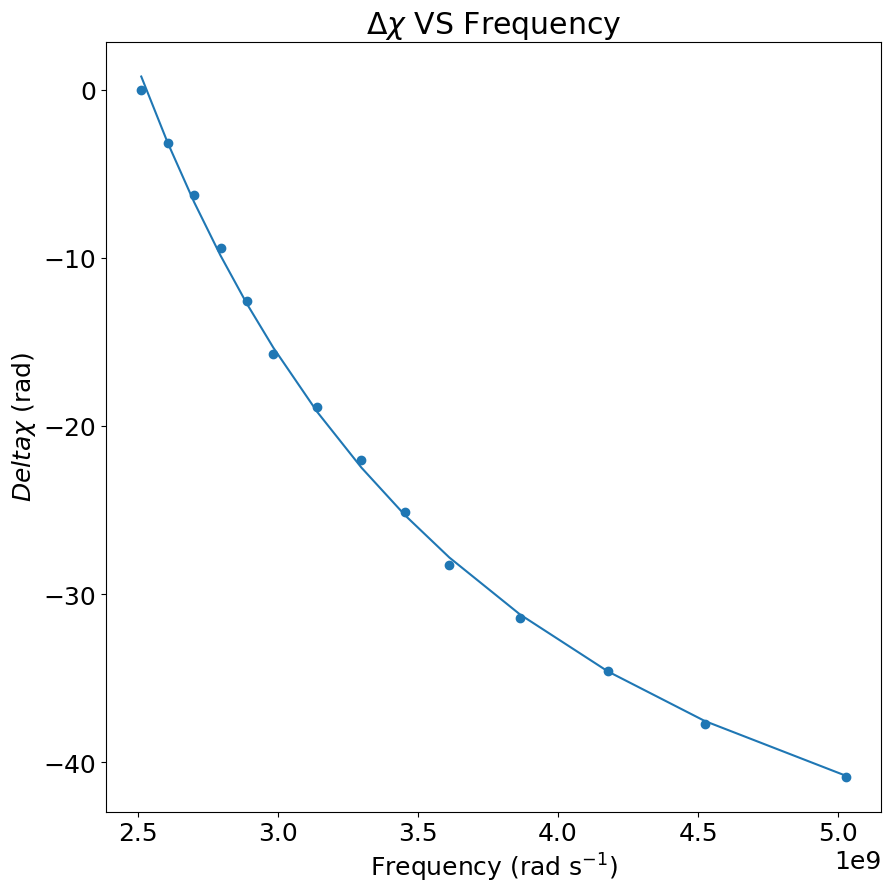

In [17]:

freq=np.array([400,415,430,445,460,475,500,525,550,575,615,665,720,800])*1E6*2*np.pi
chi=np.arange(len(freq))*-np.pi

fig,ax=plt.subplots(figsize=(10,10))
ax.set(title='$\Delta \chi$ VS Frequency',ylabel='$Delta \chi$ (rad)',xlabel='Frequency (rad s$^{-1}$)')
plt.scatter(freq,chi)

guess=(1,-40)
coeff,pcov=scipy.optimize.curve_fit(function1,freq/1E6,chi,guess)
coeff[0]=coeff[0]*(1E6)**2
plt.plot(freq,function1(freq,*coeff))

freq=0.85E10
deriv2=-coeff[0]/freq**3

#evaluate the derivative at a given frequency
print(deriv2)


In [18]:
B=deriv1*deriv2*con.m_e.cgs.value*con.c.cgs.value/con.e.esu.value
print(B)

1.8850456218866382e-10
